# <center>***Predictive Modeling***</center>

![Alt text](British-Airways-Logo.png)

****

## **Table of contents**

1. [Problem Statement](#Section1)<br>
<br> 
2. [Importing Pakages](#Section2)<br>
<br>
3. [Loading and cleaning Dataset](#Section3)<br>
    - 3.1 [Loading and Understanding Dataset](#Section3.1)<br>
    - 3.2 [Treating Missing Values](#Section3.2)<br>
<br>
4. [Exploratory Data Analysis(EDA)](#Section4)<br>
<br>
5. [Prepare data for Machine Learning Modeling](#Section5)<br>
    - 5.1 [Encoding of Categorical Variables](#Section5.1)<br>
    - 5.2 [Normalizing Numerical Variables](#Section5.2)<br>
    - 5.3 [Prepare Features and Target Variables (x, y)](#Section5.3)<br>
<br>
6. [Machine Learning Algorithms](#Section6)<br>
    - 6.1 [Logistic Regression](#Section6.1)<br>
<br>
7. [Balancing the Dataset](#Section7)<br>
<br>
8. [Prepare data for Machine Learning Modeling after Balancing](#Section8)<br>
<br>
9. [Machine Learning Algorithms](#Section9)<br>
    - 9.1 [Logistic Regression](#Section9.1)<br>
    - 9.2 [Decision Tree](#Section9.2)<br>
    - 9.3 [Random Forest](#Section9.3)<br>
    - 9.4 [KNN](#Section9.4)<br>
<br>
10. [Comparing all the results](#Section10)<br>
<br>
11. [Conclusion](#Section11)



****

<a id=Section1></a>

## **1. Problem Statment**


* In the Airspace Industry, Coustomers plays very vital role. Without them we can't fly the airplane. There is always a chance that the **Coustomer won"t book the Ticket for the flight**. It typically refers to the possibility that a **Airline may not receive the customer**, which wouldn't be benificital for the airline.<br>
<br>
* Therefore, the severity of a loss can be minimized by appropriately measuring and managing Customers Bookings.<br>
    <br>
    * Load and understand the dataset<br>
    <br>
    * Clean the dataset<br>
        * Remove unwanted columns from the dataset<br>
        * Remove the duplicate values present in the dataset<br>
        * Fill the missing values accordingly<br>
    <br>
    * Exploring the Dataset(EDA)<br>
    <br>
    * Prepare the data for Machine Learning Models<br>
        * Remove Outliers<br>
        * Scaling dataset<br>
        * Encoding<br>
        * Balancing<br>
    <br>
    * We are going to use the Four ML algorithms:<br>
        * Logistic Regression<br>
        * Decision Tree<br>
        * Random Forest<br>
        * KNN<br>
        <br>
    * Then we are going to conclude the best model accordingly.<br>

****

<a id=Section2></a>
## **2. Importing Pakages**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

****

<a id=Section3></a>
<a id=Section3.1></a>
## **3. Loading and Cleaning Dataset**
### **3.1 Loading and Understanding Dataset**

**customer_booking**

* The file customer_booking.csv contains **49982 rows** and **14 columns**.

* Detailed data description:

|Sr. No.|Column Name|Description|
|----|------|------|
|1|num_passengers|Number of Passengers Book the Ticket|
|2|sales_channel|Mode of whitch they have Booked the Ticket|
|3|trip_type|Trip Type means One Way or Round Trip|
|4|purchase_lead|Gap Between Booking and the Flight Date|
|5|length_of_stay|Howmany Days they are intent to stay|
|6|flight_hour|Take-off time of the Flight|
|7|flight_day|Week Day of the Flight|
|8|route|Route of the Flight|
|9|booking_origin|Country From the Customer Book the Ticket|
|10|wants_extra_baggage|If they wanted extra baggage or not|
|11|wants_preferred_seat|If they wanted Preferred Seat or not|
|12|wants_in_flight_meals|In Flight Meals|
|13|flight_duration|Duration of Flight|
|14|booking_complete|Whether they have Booked the Ticket or not|



In [36]:
df = pd.read_csv(r"F:\Data Science\Project\British Airways\Task 2\customer_booking.csv")

In [37]:
df = df.reset_index(drop=True)

In [38]:
df

Unnamed: 0  num_passengers sales_channel  trip_type  purchase_lead  \
0               0               2      Internet  RoundTrip            262   
1               1               1      Internet  RoundTrip            112   
2               2               2      Internet  RoundTrip            243   
3               3               1      Internet  RoundTrip             96   
4               4               2      Internet  RoundTrip             68   
...           ...             ...           ...        ...            ...   
49977       49995               2      Internet  RoundTrip             27   
49978       49996               1      Internet  RoundTrip            111   
49979       49997               1      Internet  RoundTrip             24   
49980       49998               1      Internet  RoundTrip             15   
49981       49999               1      Internet  RoundTrip             19   

       length_of_stay  flight_hour  flight_day   route booking_origin  \
0                  19            7           6  AKLDEL    New Zealand   
1                  20            3           6  AKLDEL    New Zealand   
2                  22           17           3  AKLDEL          India   
3                  31            4           6  AKLDEL    New Zealand   
4                  22           15           3  AKLDEL          India   
...               ...          ...         ...     ...            ...   
49977               6            9           6  PERPNH      Australia   
49978               6            4           7  PERPNH      Australia   
49979               6           22           6  PERPNH      Australia   
49980               6           11           1  PERPNH      Australia   
49981               6           10           4  PERPNH      Australia   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49977                    1                     0                      1   
49978                    0                     0                      0   
49979                    0                     0                      1   
49980                    1                     0                      1   
49981                    0                     1                      0   

       flight_duration  booking_complete  
0                 5.52                 0  
1                 5.52                 0  
2                 5.52                 0  
3                 5.52                 0  
4                 5.52                 0  
...                ...               ...  
49977             5.62                 0  
49978             5.62                 0  
49979             5.62                 0  
49980             5.62                 0  
49981             5.62                 0  

[49982 rows x 15 columns]

In [39]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0            7           6  AKLDEL    New Zealand                    1   
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

<a id=Section3.2></a>
### **3.2 Treating Missing Values**

In [40]:
(df.isnull().sum()/df.shape[0])*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

<a id=Section4></a>
## **4. Exploratory Data Analysis(EDA)**

In [6]:
fig = px.histogram(df, x="purchase_lead", color="booking_complete", template="plotly_dark",
                   color_discrete_sequence=["white", "grey"])

fig.update_layout(title=("<b>Purchase Lead Distribution with Booking Status</b>"), title_x=0.5,
                  xaxis_title="Purchase Lead", yaxis_title="Bookings",
                  width=1150, height=550, margin=dict(t=50, l=25, r=25, b=25))
fig.show()

* Some Peoples have been booking their flight ticket more than a year ago.
* Booking rate is High Comparatively.

In [7]:
fig = px.histogram(df,x="sales_channel",color="booking_complete",template="plotly_dark",
                   color_discrete_sequence=["#FFAB61","#9DFF61"])

fig.update_layout(title="<b>Sales Channel with the Booking Status</b>", title_x=0.5,
                  xaxis_title="Sales Channel", yaxis_title="Number of Bookings",
                  width=1150, height=550, margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [8]:
fig = px.histogram(df,x="num_passengers",color="booking_complete",template="plotly_dark")

fig.update_layout(title="<b>No. of Passengers with Complete Booking</b>", title_x=0.5,
                  xaxis_title="Number of Passengers", yaxis_title="Bookings",
                  width=1150, height=550, margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [9]:
fig = px.parallel_categories(df, dimensions=["sales_channel", "trip_type", "booking_complete"],
                             template="plotly_dark", color="booking_complete", color_continuous_scale="Earth")

fig.update_layout(title="<b>Relation between Loan Intent, Grade and Status</b>", title_x=0.5,
                  width=1150, height=550)
fig.show()

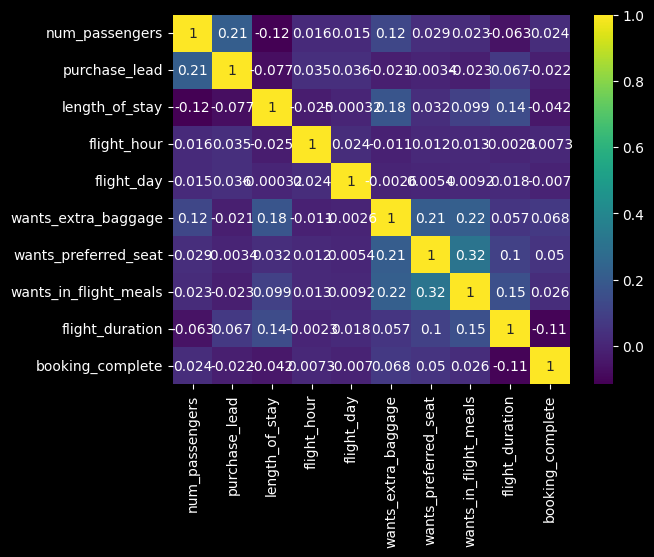

In [10]:
correlations = df.corr()
plt.style.use("dark_background")
sns.heatmap(correlations, annot=True, cmap="viridis")
plt.show()

* We can clearly note that our dataset is highly biased.

<a id=Section5></a>
## **5. Prepare data for Machine Learning Modeling**

<a id=Section5.1></a>
### **5.1 Encoding of Categorical Variables**

One Hot encoding is used to transform the categorical data into numerical data.

In [41]:
df_final = df

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encoding for Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encoding for trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)



In [43]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [44]:
#store the label for supervised learning
label = df['booking_complete']

In [45]:
features = df_final.drop('booking_complete', axis=1)

In [46]:
features

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49977               2             27               6            9           6   
49978               1            111               6            4           7   
49979               1             24               6           22           6   
49980               1             15               6           11           1   
49981               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49977                    1                     0                      1   
49978                    0                     0                      0   
49979                    0                     0                      1   
49980                    1                     0                      1   
49981                    0                     1                      0   

       flight_duration  Internet  Mobile  RoundTRip  OneWayTrip  CircleTrip  
0                 5.52       1.0     0.0        0.0         0.0         1.0  
1                 5.52       1.0     0.0        0.0         0.0         1.0  
2                 5.52       1.0     0.0        0.0         0.0         1.0  
3                 5.52       1.0     0.0        0.0         0.0         1.0  
4                 5.52       1.0     0.0        0.0         0.0         1.0  
...                ...       ...     ...        ...         ...         ...  
49977             5.62       1.0     0.0        0.0         0.0         1.0  
49978             5.62       1.0     0.0        0.0         0.0         1.0  
49979             5.62       1.0     0.0        0.0         0.0         1.0  
49980             5.62       1.0     0.0        0.0         0.0         1.0  
49981             5.62       1.0     0.0        0.0         0.0         1.0  

[49982 rows x 14 columns]

<a id=Section5.2></a>
### **5.2 Normalizaing Numerical Variables**

StandardScaler is used to transform the data into one scale.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(features)

In [48]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = features.columns)

In [49]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [50]:
scaled_df

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0            0.400769       1.971093       -0.119401    -0.381588    1.096876   
1           -0.579424       0.302987       -0.089895    -1.120618    1.096876   
2            0.400769       1.759799       -0.030885     1.465988   -0.408618   
3           -0.579424       0.125056        0.234662    -0.935861    1.096876   
4            0.400769      -0.186323       -0.030885     1.096473   -0.408618   
...               ...            ...             ...          ...         ...   
49977        0.400769      -0.642272       -0.502969    -0.012073    1.096876   
49978       -0.579424       0.291867       -0.502969    -0.935861    1.598707   
49979       -0.579424      -0.675634       -0.502969     2.389776    1.096876   
49980       -0.579424      -0.775721       -0.502969     0.357443   -1.412280   
49981       -0.579424      -0.731238       -0.502969     0.172685    0.093214   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054              -0.863557   
1                -1.421288             -0.650054              -0.863557   
2                 0.703587              1.538334              -0.863557   
3                -1.421288             -0.650054               1.158002   
4                 0.703587             -0.650054               1.158002   
...                    ...                   ...                    ...   
49977             0.703587             -0.650054               1.158002   
49978            -1.421288             -0.650054              -0.863557   
49979            -1.421288             -0.650054               1.158002   
49980             0.703587             -0.650054               1.158002   
49981            -1.421288              1.538334              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
49977        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49978        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49979        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49980        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49981        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49977      0  
49978      0  
49979      0  
49980      0  
49981      0  

[49982 rows x 15 columns]

<a id=Section5.3></a>
### **5.3 Prepare Features and Target Variables (x, y)**

In [21]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.30, random_state=42)

In [22]:
(y.value_counts()/scaled_df.shape[0])*100

0    85.042615
1    14.957385
Name: label, dtype: float64

## **6 Machine Learning Algorithms**
### **Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred_test_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

In [26]:
def APR(y_train, y_test, y_pred_train_model, y_pred_test_model):
    """
        This fuction is used to get the accuracy, precision and recall of the given model.

        Args:
        y_train (Series, DataFrame): It takes the train data of target variable.
        y_test (Series, DataFrame): It takes the test data of target variable.
        y_pred_train_model (Series, DataFrame): It takes the train data of target variable after fitting to the model.
        y_pred_test_model (Series, DataFrame): It takes the test data of target variable after fitting to the model.
    """

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score

    model_evaluation_APR = {"Train":[round(accuracy_score(y_train, y_pred_train_model)*100,ndigits=2),
                                    round(precision_score(y_train, y_pred_train_model)*100,ndigits=2),
                                    round(recall_score(y_train, y_pred_train_model)*100,ndigits=2)],

                            "Test":[round(accuracy_score(y_test, y_pred_test_model)*100,ndigits=2),
                                    round(precision_score(y_test, y_pred_test_model)*100,ndigits=2),
                                    round(recall_score(y_test, y_pred_test_model)*100,ndigits=2)]}

    model_evaluation_APR = pd.DataFrame(model_evaluation_APR, index=["Accuracy","Precision", "Recall"])
    display(model_evaluation_APR.style.background_gradient(cmap="OrRd_r"))

In [26]:
APR(y_train, y_test, y_pred_train_lr, y_pred_test_lr)

In [27]:
def confusion_matrix(y_train, y_test, y_pred_train_model, y_pred_test_model):
    """
        This fuction is used to get the accuracy, precision and recall of the given model.

        Args:
        y_train (Series, DataFrame): It takes the train data of target variable.
        y_test (Series, DataFrame): It takes the test data of target variable.
        y_pred_train_model (Series, DataFrame): It takes the train data of target variable after fitting to the model.
        y_pred_test_model (Series, DataFrame): It takes the test data of target variable after fitting to the model.
    """
    
    from sklearn.metrics import confusion_matrix
    import pandas as pd

    conf_mtx_train_model = pd.DataFrame(confusion_matrix(y_train,y_pred_train_model),
                                    index=["Actual No Default","Actual Default"],
                                    columns = ["Predicted No Default","Predicted Default"])

    print("Confusion Matrix for Train :")
    display(conf_mtx_train_model.style.background_gradient(cmap="bwr_r"))

    conf_mtx_test_model = pd.DataFrame(confusion_matrix(y_test,y_pred_test_model),
                                index=["Actual No Default","Actual Default"],
                                columns = ["Predicted No Default","Predicted Default"])

    print("Confusion Matrix for Test :")
    display(conf_mtx_test_model.style.background_gradient(cmap="bwr_r"))

In [28]:
confusion_matrix(y_train, y_test, y_pred_train_lr, y_pred_test_lr) 

Confusion Matrix for Train :


Confusion Matrix for Test :


* One major problem behind getting low Precision and Recall is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1. 

<a id=Section6></a>
## **6. Balancing the Dataset**

In [52]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [53]:
#create a dataframe having all labels 0 with 7476 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=7476)

In [54]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [55]:
scaled_df_new

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           -0.579424      -0.775721        0.234662     1.465988   -1.412280   
1           -0.579424       0.792298       -0.119401     0.911715   -1.412280   
2           -0.579424       1.070316        1.886956    -1.305376   -0.910449   
3           -0.579424       0.469798       -0.178411     1.281231   -0.910449   
4           -0.579424      -0.475462       -0.178411     0.911715   -0.910449   
...               ...            ...             ...          ...         ...   
14947       -0.579424      -0.842445       -0.502969    -0.381588   -1.412280   
14948        2.361155      -0.764600       -0.502969    -1.490134   -0.910449   
14949        0.400769      -0.797962       -0.561979    -0.012073    1.598707   
14950        1.380962       1.036954       -0.532474    -0.751103   -1.412280   
14951        0.400769      -0.886928       -0.532474     0.172685   -1.412280   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                -1.421288             -0.650054              -0.863557   
1                 0.703587             -0.650054              -0.863557   
2                 0.703587             -0.650054               1.158002   
3                 0.703587             -0.650054               1.158002   
4                -1.421288             -0.650054              -0.863557   
...                    ...                   ...                    ...   
14947             0.703587              1.538334              -0.863557   
14948             0.703587              1.538334              -0.863557   
14949            -1.421288             -0.650054              -0.863557   
14950            -1.421288             -0.650054              -0.863557   
14951             0.703587             -0.650054              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3             1.037314 -2.810681  2.810681  -0.048231   -0.088336    0.100826   
4             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
14947        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
14948        -0.439155  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
14949        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
14950        -0.185282  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
14951        -1.434602 -2.810681  2.810681  -0.048231   -0.088336    0.100826   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
14947      0  
14948      0  
14949      0  
14950      0  
14951      0  

[14952 rows x 15 columns]

<a id=Section8></a>
## **8. Prepare Features and Target Variables (x, y) [After Balancing]**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.30, random_state=42)

<a id=Section6></a>
## **9. Machine Learning Algorithms [After Balancing]**

<a id=Section9.1></a>
### **9.1 Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred_test_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

In [60]:
APR(y_train, y_test, y_pred_train_lr, y_pred_test_lr)

In [61]:
confusion_matrix(y_train, y_test, y_pred_train_lr, y_pred_test_lr)

Confusion Matrix for Train :


Confusion Matrix for Test :


<a id=Section9.2></a>
### **9.2 Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier(random_state=0)

tree_para = [{"criterion":["gini","entropy","log_loss"],
              "max_depth":range(5,11),
              "max_features":[5, "log2", None],
              "splitter":["best","random"],
              "min_samples_split":range(12,15)}]

dt_GSCV = GridSearchCV(dt_classifier, tree_para, cv=10, refit="AUC", scoring="recall", n_jobs=-1) 

In [39]:
dt_GSCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': range(5, 11),
                          'max_features': [5, 'log2', None],
                          'min_samples_split': range(12, 15),
                          'splitter': ['best', 'random']}],
             refit='AUC', scoring='recall')

In [40]:
y_pred_test_dt_GSCV = dt_GSCV.predict(X_test)
y_pred_train_dt_GSCV = dt_GSCV.predict(X_train)

In [41]:
APR(y_train, y_test, y_pred_train_dt_GSCV, y_pred_test_dt_GSCV)

In [42]:
confusion_matrix(y_train, y_test, y_pred_train_dt_GSCV, y_pred_test_dt_GSCV)            #decision Tree with tuning

Confusion Matrix for Train :


Confusion Matrix for Test :


<a id=Section9.3></a>
### **9.3 Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestClassifier(random_state=0)

for_para = {"criterion":["gini", "entropy"],
            "max_depth":range(3,6),
            "max_features":["sqrt", "log2", 5],
            "min_samples_split":range(6,9),
            "min_samples_leaf":range(1,3),
            "bootstrap":[True,False],
            "n_estimators":[100,400]}

rf_RSCV = RandomizedSearchCV(rf, param_distributions=for_para, n_iter=100, n_jobs=-1)

In [45]:
rf_RSCV.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 3),
                                        'min_samples_split': range(6, 9),
                                        'n_estimators': [100, 400]})

In [46]:
y_pred_train_rf_RSCV = rf_RSCV.predict(X_train)
y_pred_test_rf_RSCV = rf_RSCV.predict(X_test)

##### **Model Evaluation**

* **By Accuracy, Precison and Recall**

In [47]:
APR(y_train, y_test, y_pred_train_rf_RSCV, y_pred_test_rf_RSCV)

* **By Confusion Matrix**

In [48]:
confusion_matrix(y_train, y_test, y_pred_train_rf_RSCV, y_pred_test_rf_RSCV)

Confusion Matrix for Train :


Confusion Matrix for Test :


<a id=Section9.4></a>
### **9.4 KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)                  # 2,3,4,5,6,7,8,9,10 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [50]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [51]:
APR(y_train, y_test, y_pred_train_knn, y_pred_test_knn)

In [52]:
confusion_matrix(y_train, y_test, y_pred_train_knn, y_pred_test_knn)

Confusion Matrix for Train :


Confusion Matrix for Test :


## **10. Comparing all the results**

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
model_evaluation_final = pd.DataFrame({"Model":["Logistic Regression","Decision Tree",
                                                "Random Forest", "KNN",

                                                "Logistic Regression","Decision Tree",
                                                "Random Forest", "KNN",

                                               "Logistic Regression","Decision Tree",
                                                "Random Forest", "KNN"],
                    
                                        "A/P/R":["Accuracy","Accuracy",
                                                 "Accuracy","Accuracy",

                                                 "Precision", "Precision",
                                                 "Precision", "Precision",

                                                 "Recall", "Recall",
                                                 "Recall", "Recall"],

                                        "Train":[round(accuracy_score(y_train, y_pred_train_lr)*100,ndigits=2),round(accuracy_score(y_train, y_pred_train_dt_GSCV)*100,ndigits=2),
                                                 round(accuracy_score(y_train, y_pred_train_rf_RSCV)*100,ndigits=2),round(accuracy_score(y_train, y_pred_train_knn)*100,ndigits=2),

                                                 round(precision_score(y_train, y_pred_train_lr)*100,ndigits=2),round(precision_score(y_train, y_pred_train_dt_GSCV)*100,ndigits=2),
                                                 round(precision_score(y_train, y_pred_train_rf_RSCV)*100,ndigits=2),round(precision_score(y_train, y_pred_train_knn)*100,ndigits=2),

                                                 round(recall_score(y_train, y_pred_train_lr)*100,ndigits=2),round(recall_score(y_train, y_pred_train_dt_GSCV)*100,ndigits=2),
                                                 round(recall_score(y_train, y_pred_train_rf_RSCV)*100,ndigits=2),round(recall_score(y_train, y_pred_train_knn)*100,ndigits=2)],

                                        "Test":[round(accuracy_score(y_test, y_pred_test_lr)*100,ndigits=2),round(accuracy_score(y_test, y_pred_test_dt_GSCV)*100,ndigits=2),
                                                round(accuracy_score(y_test, y_pred_test_rf_RSCV)*100,ndigits=2),round(accuracy_score(y_test, y_pred_test_knn)*100,ndigits=2),


                                                round(precision_score(y_test, y_pred_test_lr)*100,ndigits=2),round(precision_score(y_test, y_pred_test_dt_GSCV)*100,ndigits=2),
                                                round(precision_score(y_test, y_pred_test_rf_RSCV)*100,ndigits=2),round(precision_score(y_test, y_pred_test_knn)*100,ndigits=2),

                                                round(recall_score(y_test, y_pred_test_lr)*100,ndigits=2),round(recall_score(y_test, y_pred_test_dt_GSCV)*100,ndigits=2),
                                                round(recall_score(y_test, y_pred_test_rf_RSCV)*100,ndigits=2),round(recall_score(y_test, y_pred_test_knn)*100,ndigits=2)]})

display(model_evaluation_final.style.background_gradient(cmap="binary_r"))

## **Conclusion**

* While predicting the person is goging to book the ticket or not Recall is very crucial parameter to control.

* Because we must have to reduce the False Negative (Type II Error).

* We are going to select the Random Forest model.

* TheRandom Forest model was chosen because it provided the best Accuracy, Precision and Recall during testing and training among all the other algorithms.

|A/P/R|Train|Test|
|-----|-----|----|
|*Accuracy*|*64.7%*|*61.73%*|
|Precision|64.40%|61.45%|
|**Recall**|**63.40%**|**61.54%**|